<a href="https://colab.research.google.com/github/Saadi128/EDA-PROJECT-REPORT/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Multilinear Regression & Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Data Pre-processing

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize the features (excluding target)
scaler = StandardScaler()
feature_columns = df_encoded.drop("math score", axis=1).columns
df_encoded[feature_columns] = scaler.fit_transform(df_encoded[feature_columns])

df_encoded.head()


Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,0.193999,0.391492,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,0.741881,0.746748
1,69,1.427476,1.313269,-0.964625,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,-1.339140
2,90,1.770109,1.642475,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,0.741881,0.746748
3,47,-0.833899,-1.583744,1.036672,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,-1.347925,0.746748
4,76,0.605158,0.457333,1.036672,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,0.746748


This code performs data pre-processing.

1. It checks for missing values in the dataset using `isnull().sum()`.
2. It applies one-hot encoding to convert categorical variables into numerical format.
3. It standardizes all features (except the target `math score`) using `StandardScaler` to ensure all features are on the same scale.
4. Finally, it displays the first few rows of the processed dataset.


In [4]:
# Feature Engineering

# Define features (X) and target (y)
X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]


This code defines the inputs and output for the regression models.

`x` contains all the feature columns except `"math score"`. `y` is the target variable, which is the `"math score"` we want to predict.


In [5]:
# Model Building

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Multilinear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Model 2: Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)


This code builds two regression models.

1. The dataset is split into training (80%) and testing (20%) sets using `train_test_split`.
2. A Multilinear Regression model is trained on the training data and used to predict math scores on the test set.
3. A Polynomial Regression model is created by transforming the features into polynomial terms (degree 2), then trained and tested similarly.
4. Predictions for both models (`y_pred_lin` and `y_pred_poly`) are generated for later evaluation.


In [6]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  MAE : {mae:.3f}")
    print(f"  R²  : {r2:.3f}")
    print("-" * 40)
    return rmse, mae, r2

# Evaluate both models
results = {}
results['Multilinear'] = evaluate_model(y_test, y_pred_lin, "Multilinear Regression")
results['Polynomial'] = evaluate_model(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")


Multilinear Regression Evaluation:
  RMSE: 5.394
  MAE : 4.215
  R²  : 0.880
----------------------------------------
Polynomial Regression (Degree 2) Evaluation:
  RMSE: 5.727
  MAE : 4.544
  R²  : 0.865
----------------------------------------


1. This code defines a function `evaluate_model` to calculate and display model performance metrics. RMSE, MAE, and R² score.
2. It then uses this function to evaluate both the Multilinear and Polynomial Regression models on the test set.
3. The results are stored in a dictionary called `results` for comparison.


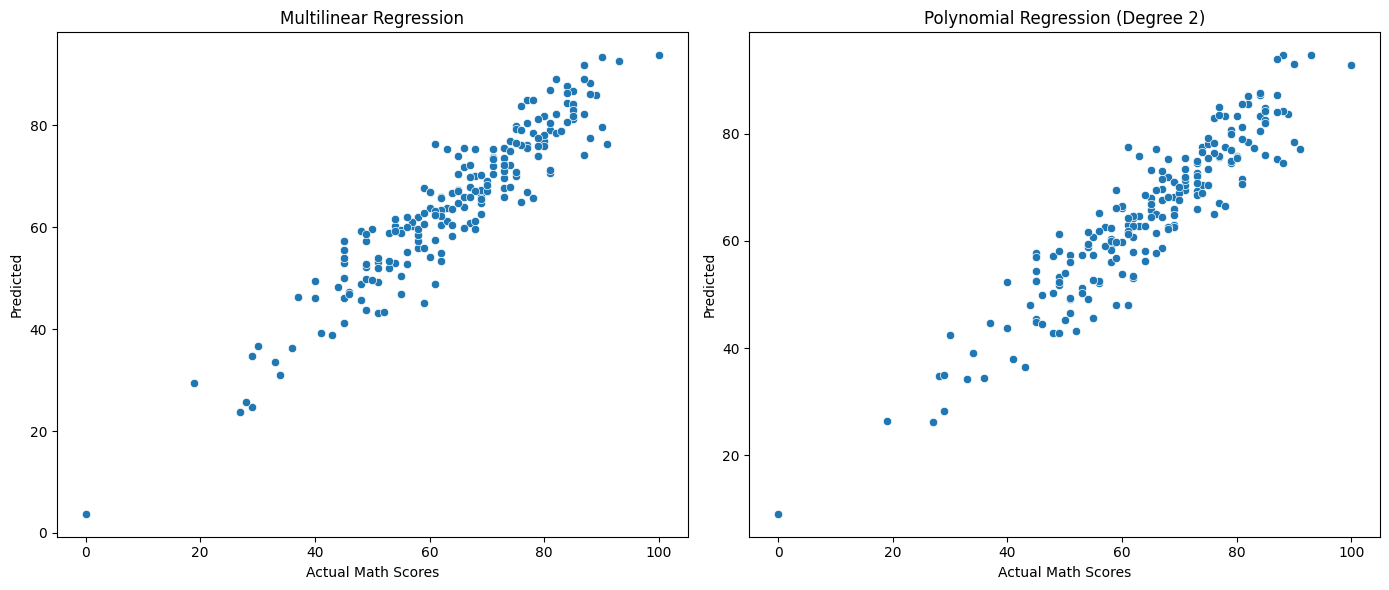

In [7]:
# Visualization

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted")
plt.title("Multilinear Regression")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted")
plt.title("Polynomial Regression (Degree 2)")

plt.tight_layout()
plt.show()


This code creates side-by-side scatter plots to visualize the performance of both models.

1. The first plot shows actual vs predicted math scores for the Multilinear Regression model.
2. The second plot does the same for the Polynomial Regression model.
3. This helps visually assess how closely the predictions match the actual values and spot any patterns or errors.


In [8]:
# Summary Table
summary_df = pd.DataFrame(results, index=["RMSE", "MAE", "R2 Score"])
summary_df.T


,RMSE,MAE,R2 Score
Multilinear,5.393994,4.214763,0.880433
Polynomial,5.727112,4.543567,0.865209


1. This code creates a summary table of evaluation metrics (RMSE, MAE, R² Score) for both models using a DataFrame and displays it in a readable format.


Part 2: Naive Bayes, KNN, and Decision Tree

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# Drop User ID
df.drop('User ID', axis=1, inplace=True)


This code removes the 'User ID' column from the DataFrame `df`.


In [13]:
# Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

This code converts the 'Gender' column into numeric labels using `LabelEncoder`.


In [14]:
# Encode target variable
df['Purchased'] = LabelEncoder().fit_transform(df['Purchased'])

This code encodes the 'Purchased' column into numeric labels using `LabelEncoder`.


In [15]:
# Features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

This code selects the 'Age' and 'EstimatedSalary' columns as features `X` and the 'Purchased' column as the target variable `y` from the DataFrame `df`.


In [16]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (75/25)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

This code standardizes the features in `X` using `StandardScaler`, scaling them to have zero mean and unit variance. Then, it splits the scaled data into training and testing sets with a 75/25 ratio, ensuring reproducibility with a fixed random seed.


Model Training & Evaluation

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:


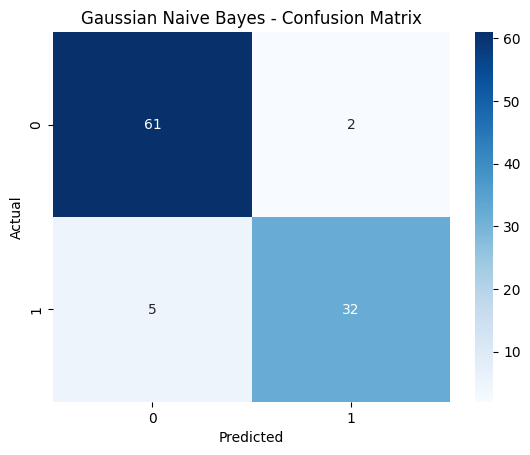

KNN (k=3) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.89      0.89      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100

Confusion Matrix:


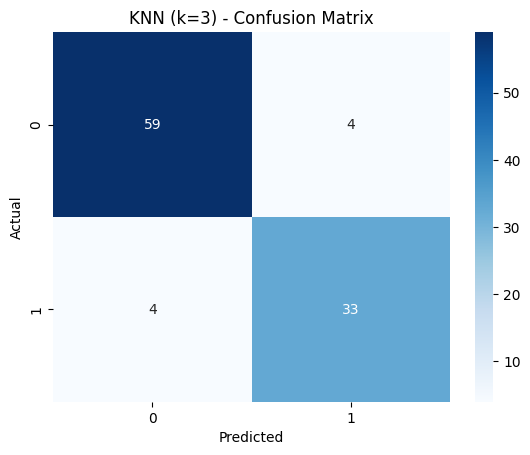

KNN (k=5) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.89      0.92      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:


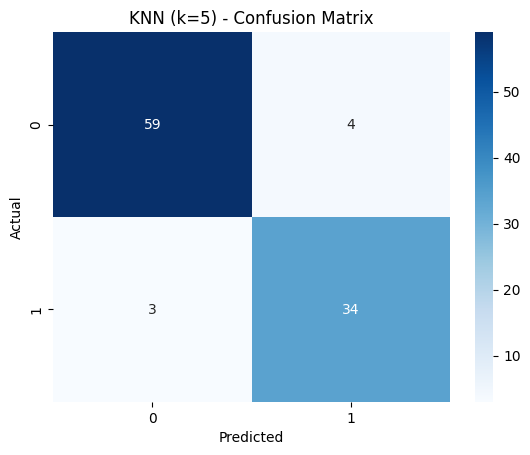

KNN (k=7) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:


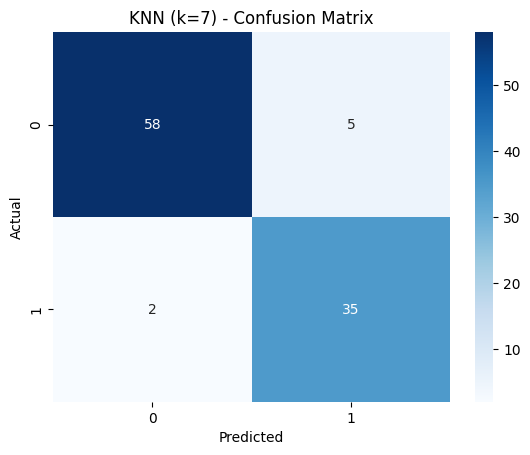

Decision Tree (gini) Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:


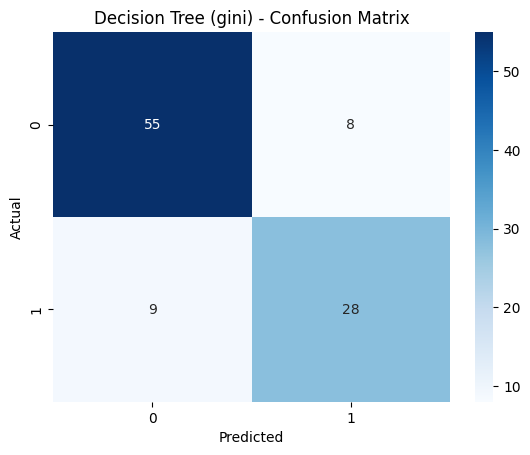

Decision Tree (entropy) Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100

Confusion Matrix:


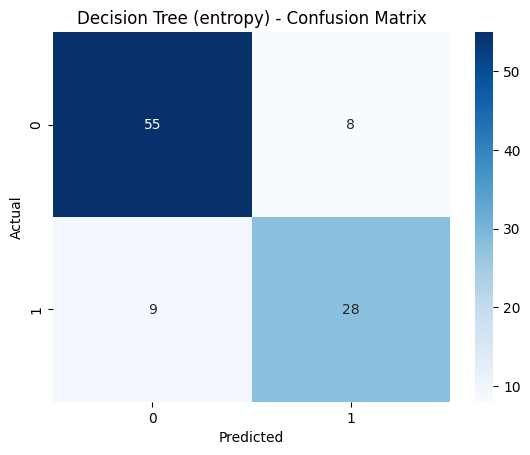

In [20]:
# Function to evaluate models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate_model(gnb, "Gaussian Naive Bayes")

# KNN for k = 3, 5, 7
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    evaluate_model(knn, f"KNN (k={k})")

# Decision Tree (Gini & Entropy)
for criterion in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X_train, y_train)
    evaluate_model(dt, f"Decision Tree ({criterion})")


This code defines a function `evaluate_model` that prints the classification report and plots the confusion matrix for a given model's predictions on the test set. It then trains and evaluates a Gaussian Naive Bayes model, K-Nearest Neighbors models with k=3, 5, and 7, and Decision Tree classifiers using both 'gini' and 'entropy' criteria, displaying their performance metrics and confusion matrices.


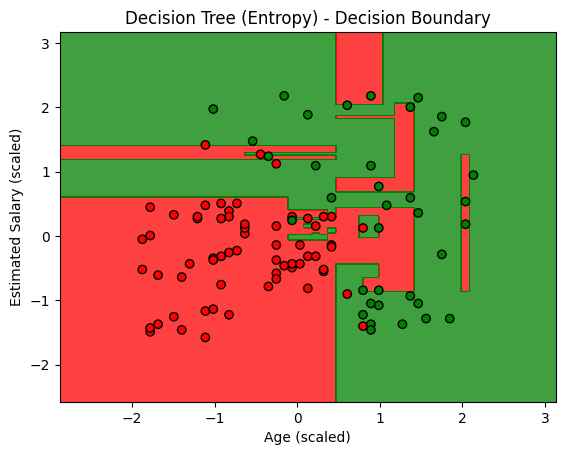

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, title):
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(
        X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75, cmap=ListedColormap(('red', 'green'))
    )
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolors='k', cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.show()

# Example: Plot for Decision Tree using 'entropy'
plot_decision_boundary(dt, "Decision Tree (Entropy) - Decision Boundary")


This code defines a function `plot_decision_boundary` that visualizes the decision boundary of a classification model on test data (`X_test`, `y_test`). It creates a grid of points spanning the feature space, predicts the class for each grid point using the model, and colors the regions accordingly. It then plots the test data points over this colored background, using different colors for each class. The plot is titled and labeled for features "Age (scaled)" and "Estimated Salary (scaled)". Finally, the function is called to display the decision boundary for a Decision Tree model using entropy.
